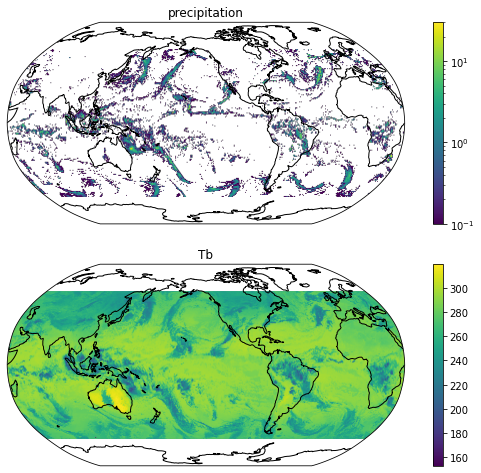

In [5]:
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
mpl.rcParams['figure.dpi'] = 72

ds = xr.open_zarr('https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/v1/IR_IMERG_combined/IR_IMERG_combined_V07B.hp_z9.zarr')
# time in ['2019-08-01 00:00', '2020-08-31 00:00']
time = '2021-12-31 00:00'
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)})
def egh_plot(data, ax, **kwargs):
    ax.set_title(data.name)
    ax.set_global()
    im = egh.healpix_show(data, ax=ax, **kwargs)
    plt.colorbar(im, ax=ax)
    ax.coastlines()

egh_plot(ds.precipitation.sel(time=time), ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30))
egh_plot(ds.Tb.sel(time=time), ax=ax1)

In [5]:
ds.Tb.attrs

{'cell_measures': 'area: area',
 'standard_name': 'brightness_temperature',
 'units': 'K'}